## AccelerateAI - Time Series Analysis and Forecasting

### Time Series Analysis using Python packages
 
In this notebook we will cover the following: 
- Moving window 
- Rolling window # Correct to Expanding Window
- Auto Correlation
- Cointegration

#### 1. Rolling(Moving) Window
Moving averages are frequently used to smoothen and analyze time series.

<img src="moving_window.jpg" alt="Drawing" style="width: 500px;"/>

In [2]:
# Required libraries
import pandas as pd
from pandas_datareader import data

import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Get the DAX index from Yahoo
DAX = data.DataReader(name='^GDAXI', data_source='yahoo', start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5805 entries, 2000-01-03 to 2022-11-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5805 non-null   float64
 1   Low        5805 non-null   float64
 2   Open       5805 non-null   float64
 3   Close      5805 non-null   float64
 4   Volume     5805 non-null   float64
 5   Adj Close  5805 non-null   float64
dtypes: float64(6)
memory usage: 317.5 KB


In [4]:
DAX.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-07,13611.299805,13391.000000,13398.790039,13533.519531,56990600.0,13533.519531
2022-11-08,13689.610352,13487.910156,13506.650391,13688.750000,60728100.0,13688.750000
2022-11-09,13691.120117,13557.080078,13653.980469,13666.320312,64013300.0,13666.320312
2022-11-10,14157.250000,13599.349609,13603.790039,14146.089844,114862700.0,14146.089844
2022-11-11,14263.530273,14172.469727,14179.389648,14224.860352,103682300.0,14224.860352


<AxesSubplot:xlabel='Date'>

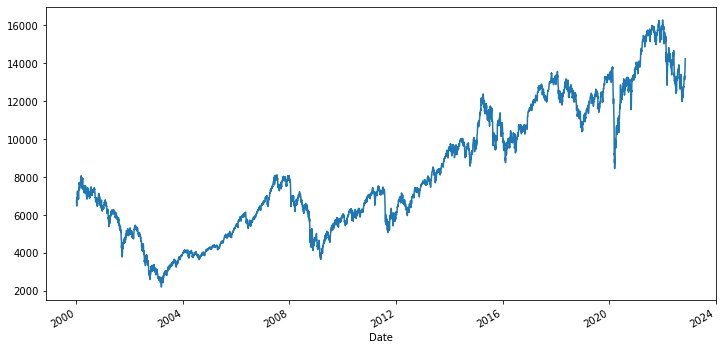

In [5]:
DAX['Close'].plot(figsize=(12, 6))

##### Simple Moving Average
\begin{equation*}
SMA: y_m =   \frac{a_{k} + a_{k-1} + ... + a_{k-(m-1)}}{m}
\end{equation*}

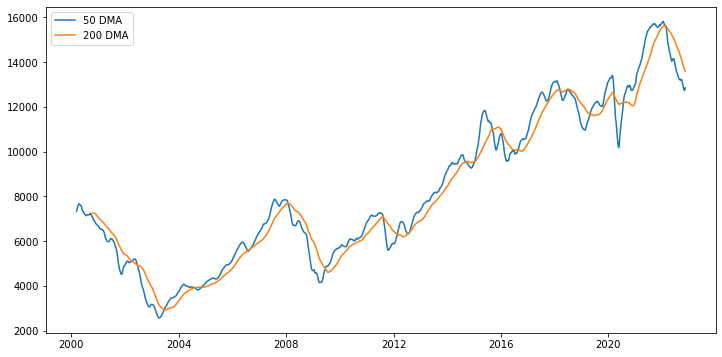

In [9]:
# Plot the moving average
year_range = DAX['Close'].index

plt.figure(figsize=(12,6)) 

#plt.plot(year_range, DAX['Close'], label="Original")
plt.plot(year_range, DAX['Close'].rolling(50).mean(), label="50 DMA")      #30 day moving average
plt.plot(year_range, DAX['Close'].rolling(200).mean(),label="200 DMA")     #100 day moving average
#plt.plot(year_range, DAX['Close'] , label="Daily Returns") # Plotting daily returns for illustration
plt.legend()
plt.show()

#### 2. Expanding Window
<img src="expanding_window.jpg" alt="Drawing" style="width: 500px;"/>

In [7]:
# Expanding Mean
DAX['Close'].expanding(min_periods = 1).mean()[1:5]

Date
2000-01-04    6668.854980
2000-01-05    6613.259928
2000-01-06    6578.674927
2000-01-07    6619.131934
Name: Close, dtype: float64

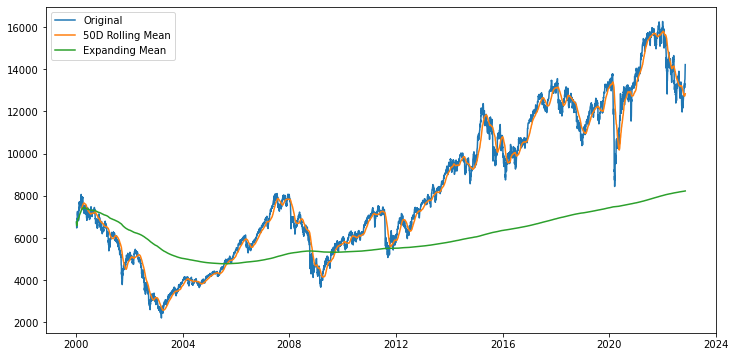

In [10]:
# Plot the moving average
year_range = DAX['Close'].index

plt.figure(figsize=(12,6)) 

plt.plot(year_range, DAX['Close'], label="Original")
plt.plot(year_range, DAX['Close'].rolling(50).mean(), label="50D Rolling Mean")      
plt.plot(year_range, DAX['Close'].expanding(min_periods = 1).mean(), label="Expanding Mean")      
plt.legend()
plt.show()

##### Exponential Moving Average

###### 1. Weighted Average method:
\begin{equation*}
EMA: y_k = \frac{a_{k} + (1-\alpha)a_{k-1} + (1-\alpha)^{2}a_{k-2}... + (1-\alpha)^{k}a_{0}}{1 + (1-\alpha) + (1-\alpha)^{2}+ ... + (1-\alpha)^{k}}  
\end{equation*}

##### 2. Recursive calculation:
$$
 y_0 = a_0
$$

$$
 y_k = (1-\alpha)y_{k-1} + \alpha a_k
$$

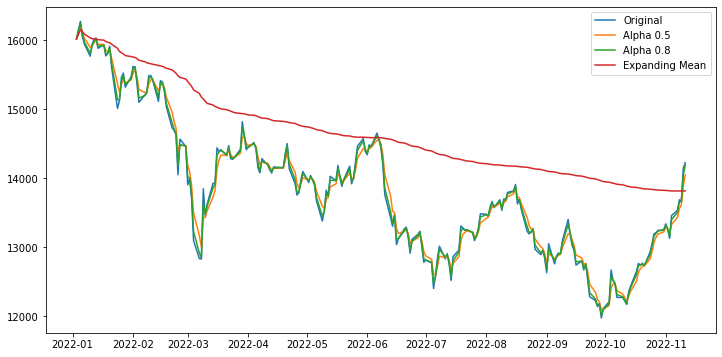

In [11]:
# Plot the exponential moving average
df = DAX['Close'].truncate(before="2022-01-01")
df.shape

year_range = df.index

plt.figure(figsize=(12,6)) 

plt.plot(year_range, df, label="Original")
plt.plot(year_range, df.ewm(alpha=0.5).mean(), label="Alpha 0.5")      #30 day moving average
plt.plot(year_range, df.ewm(alpha=0.8).mean(),label="Alpha 0.8")       #100 day moving average
plt.plot(year_range, df.expanding(min_periods = 1).mean(), label="Expanding Mean")      

plt.legend()
plt.show()

In [12]:
# Try with a more volatile dataset - Sunspots on annual basis
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


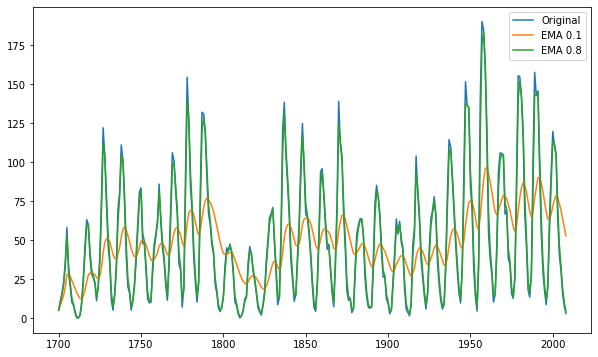

In [13]:
# Plot the exponential moving average
year_range = df["YEAR"].values

plt.figure(figsize=(10,6)) 

plt.plot(year_range, df["SUNACTIVITY"].values, label="Original")
plt.plot(year_range, df["SUNACTIVITY"].ewm(alpha=0.1).mean(), label="EMA 0.1")    #alpha = 0.1 - low decay
plt.plot(year_range, df["SUNACTIVITY"].ewm(alpha=0.8).mean(),label="EMA 0.8")     #alpha = 0.8 - high decay
plt.legend()
plt.show()

#### 3. Auto Correlation

<img src="autocorrelation.GIF" alt="Drawing" style="width: 250px;"/>

In [185]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

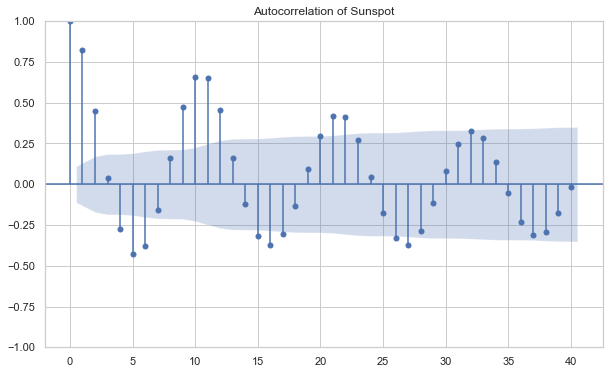

In [186]:
#ACF - plot of the correlation of a time series with its lag is called AutoCorrelation Function

fig, ax = plt.subplots(figsize=(10, 6))  #To make the chart a bit bigger

plot_acf(df["SUNACTIVITY"].values, lags=40, title='Autocorrelation of Sunspot', ax=ax)
plt.show()

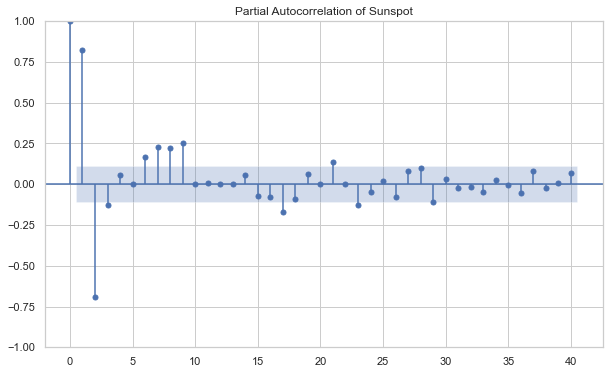

In [187]:
# The partial autocorrelation at lag k - the correlation after removing the effect of shorter lags correlation

fig, ax = plt.subplots(figsize=(10, 6))  #To make the chart a bit bigger

plot_pacf(df["SUNACTIVITY"].values, lags=40, method='ols', title='Partial Autocorrelation of Sunspot', ax=ax)
plt.show()

#### 4. Co-Integration

A cointegration test is used to establish if there is a correlation between several time series in the long term.

<img src="cointegration.jpg" alt="Drawing" style="width: 800px;"/>

In [14]:
import pandas_datareader as pdr               #for retreiving stock prices
import seaborn as sns

from statsmodels.tsa.stattools import coint 

In [15]:
# Have a list of tech stock tickers
tickers = ['msft', 'aapl', 'nvda', 'goog']
stockdata = pdr.get_data_yahoo(tickers)

In [17]:
stockdata.head()

Attributes  Adj Close                                       Close             \
Symbols          msft       aapl       nvda       goog       msft       aapl   
Date                                                                           
2017-11-13  78.864799  41.357010  52.598087  51.287498  83.930000  43.492500   
2017-11-14  78.977570  40.731792  52.981510  51.299999  84.050003  42.834999   
2017-11-15  78.363708  40.194530  51.942566  51.045502  82.980003  42.270000   
2017-11-16  78.571480  40.674736  52.345772  51.625000  83.199997  42.775002   
2017-11-17  77.815994  40.448898  52.283943  50.954498  82.400002  42.537498   

Attributes                             High             ...        Low  \
Symbols          nvda       goog       msft       aapl  ...       nvda   
Date                                                    ...              
2017-11-13  53.157501  51.287498  83.940002  43.625000  ...  53.002499   
2017-11-14  53.544998  51.299999  84.099998  43.369999  ...  52.807499   
2017-11-15  52.494999  51.045502  83.690002  42.580002  ...  51.950001   
2017-11-16  52.902500  51.625000  83.419998  42.967499  ...  52.812500   
2017-11-17  52.840000  50.954498  83.120003  42.847500  ...  52.687500   

Attributes                  Open                                       Volume  \
Symbols          goog       msft       aapl       nvda       goog        msft   
Date                                                                            
2017-11-13  51.128502  83.660004  43.375000  54.035000  51.171001  14196900.0   
2017-11-14  50.707500  83.500000  43.259998  53.250000  51.129501  18801300.0   
2017-11-15  50.771000  83.470001  42.492500  52.987499  50.960499  19383100.0   
2017-11-16  51.125999  83.099998  42.794998  53.244999  51.125999  20962800.0   
2017-11-17  50.887501  83.120003  42.759998  53.480000  51.700500  22079000.0   

Attributes                                       
Symbols            aapl        nvda        goog  
Date                                             
2017-11-13   67928400.0  58237600.0  17716000.0  
2017-11-14   99130000.0  52929200.0  19184000.0  
2017-11-15  116632400.0  50194800.0  17080000.0  
2017-11-16   94550000.0  44176800.0  22594000.0  
2017-11-17   87598000.0  51566400.0  27942000.0  

[5 rows x 24 columns]

Symbols          msft       aapl       nvda       goog
Date                                                  
2017-11-13  83.930000  43.492500  53.157501  51.287498
2017-11-14  84.050003  42.834999  53.544998  51.299999
2017-11-15  82.980003  42.270000  52.494999  51.045502
2017-11-16  83.199997  42.775002  52.902500  51.625000
2017-11-17  82.400002  42.537498  52.840000  50.954498


<AxesSubplot:xlabel='Date'>

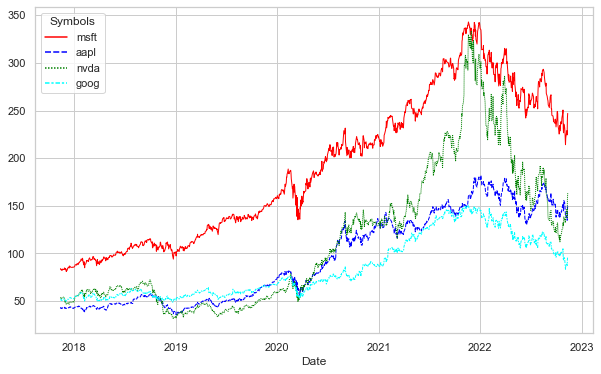

In [16]:
df = stockdata.Close
print(df.head())

sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})          #increase the figure size
sns.lineplot(data=df, linewidth=1, palette=['red', 'blue', 'green', 'aqua'])

In [20]:
# Test for no-cointegration of a univariate equation.
# The null hypothesis is no cointegration. Variables df1 and df2 are assumed to be integrated of order 1, I(1).

coint_t, p_val, critical_val = coint(df['msft'], df['aapl'])
print('The p value is', p_val, 'and the t value is' , coint_t)     

The p value is 0.4045492553075182 and the t value is -2.2386147010403947


In [192]:
coint_t, p_val, critical_val = coint(df['msft'], df['nvda'])
p_val

0.5251899947423192

- Cointegration describes a long-term relationship between asset prices.
- Cointegration can be seen as a measure of similarity of assets in terms of risk exposure profiles.